In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv(r"C:\Users\hp\Documents\Data Science\Naresh IT\EDA with Python\Visadataset - Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


{'whiskers': [<matplotlib.lines.Line2D at 0x298551a9850>,
 'caps': [<matplotlib.lines.Line2D at 0x298551b0e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x298551a8210>],
 'medians': [<matplotlib.lines.Line2D at 0x298551b3c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x298551b9290>],
 'means': []}

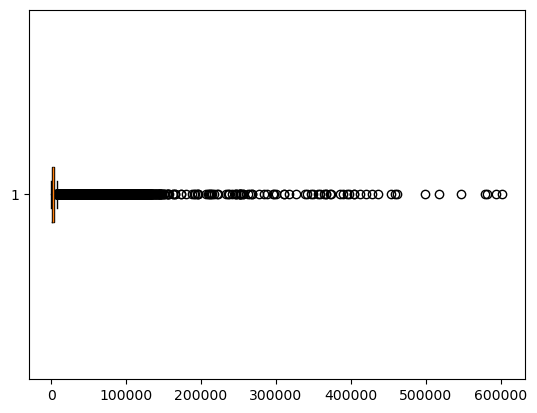

In [4]:
plt.boxplot(visa_df['no_of_employees'],vert=False)

In [ ]:
# Too much Outliers

<Axes: >

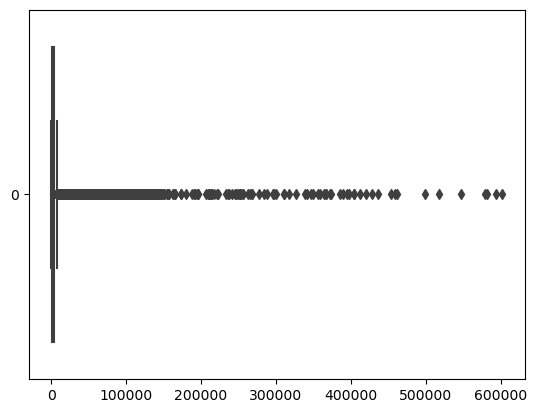

In [5]:
#In Seaborn
sns.boxplot(visa_df['no_of_employees'],orient='h')

{'whiskers': [<matplotlib.lines.Line2D at 0x2985b6b0d90>,
 'caps': [<matplotlib.lines.Line2D at 0x2985b6b26d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2985b6b0290>],
 'medians': [<matplotlib.lines.Line2D at 0x2985b6b3c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2985b6b4850>],
 'means': []}

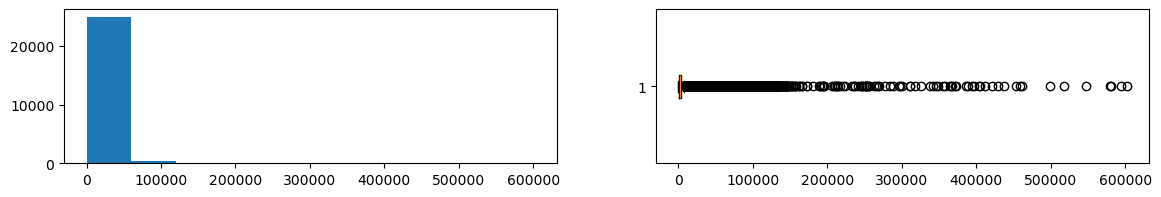

In [11]:
plt.figure(figsize=(14,2))

plt.subplot(1,2,1).hist(visa_df['no_of_employees'])
plt.subplot(1,2,2).boxplot(visa_df['no_of_employees'],vert=False)

**Finding the outliers**

In [15]:
Q1=np.percentile(visa_df['no_of_employees'],25)
Q3=np.percentile(visa_df['no_of_employees'],75)
print(Q1,Q3)

1022.0 3504.0


In [18]:
LB=Q1-1.5*(Q3-Q1)
UB=Q3+1.5*(Q3-Q1)
print(LB,UB)

-2701.0 7227.0


In [19]:
con1=visa_df['no_of_employees']<LB
con2=visa_df['no_of_employees']>UB
print(con1,con2)

0        False
1        False
2        False
3        False
4        False
         ...  
25475    False
25476    False
25477    False
25478    False
25479    False
Name: no_of_employees, Length: 25480, dtype: bool 0         True
1        False
2         True
3        False
4        False
         ...  
25475    False
25476    False
25477    False
25478    False
25479    False
Name: no_of_employees, Length: 25480, dtype: bool


In [20]:
outliers=visa_df[con1 | con2]
print(outliers)

         case_id      continent education_of_employee has_job_experience  \
0         EZYV01           Asia           High School                  N   
2         EZYV03           Asia            Bachelor's                  N   
12        EZYV13           Asia            Bachelor's                  Y   
14        EZYV15           Asia              Master's                  Y   
16        EZYV17         Europe              Master's                  Y   
...          ...            ...                   ...                ...   
25441  EZYV25442           Asia              Master's                  N   
25443  EZYV25444         Africa            Bachelor's                  N   
25455  EZYV25456  South America            Bachelor's                  N   
25464  EZYV25465           Asia              Master's                  N   
25471  EZYV25472           Asia           High School                  N   

      requires_job_training  no_of_employees  yr_of_estab  \
0                         

In [21]:
len(outliers)

1556

In [22]:
# so 1556 is total no of employees as outliers

**Non Outliers Data**

In [24]:
con3=visa_df['no_of_employees']>LB
con4=visa_df['no_of_employees']<UB
non_oultiers_data=visa_df[con3 & con4]
non_oultiers_data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.03,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.39,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified


In [25]:
len(non_oultiers_data)

23924

# 23924 are non oultiers - noOfEmployees

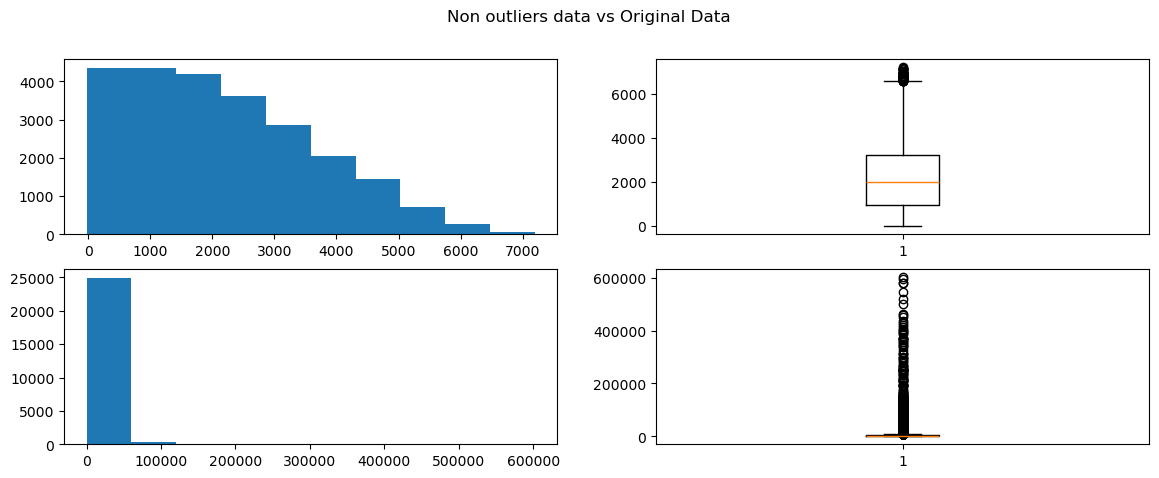

In [26]:
plt.figure(figsize=(14,5))

plt.suptitle("Non outliers data vs Original Data")
plt.subplot(2,2,1).hist(non_oultiers_data['no_of_employees'])
plt.subplot(2,2,2).boxplot(non_oultiers_data['no_of_employees'])

plt.subplot(2,2,3).hist(visa_df['no_of_employees'])
plt.subplot(2,2,4).boxplot(visa_df['no_of_employees'])
plt.show()

(array([4359., 4342., 4204., 3625., 2859., 2052., 1434.,  711.,  269.,
          69.]),
 array([ -26. ,  696.1, 1418.2, 2140.3, 2862.4, 3584.5, 4306.6, 5028.7,
        5750.8, 6472.9, 7195. ]),
 <BarContainer object of 10 artists>)

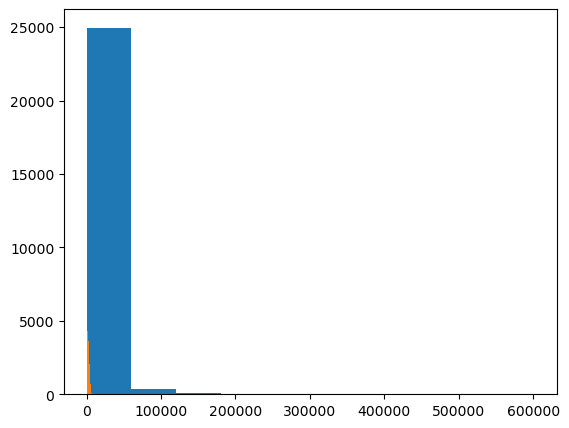

In [27]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(visa_df['no_of_employees'])
plt.subplot(1,2,1).hist(non_oultiers_data['no_of_employees'])

**How to deal with outliers**

- Drop outliers
- Fill with Median value
- Cap the values with Q1 and Q3

**Fill with Median value**

- create empty list
- iterate the visa_df['no_of_employees'].values
- if each value ub then append with median value,else append with i value

{'whiskers': [<matplotlib.lines.Line2D at 0x2985bbf6e50>,
 'caps': [<matplotlib.lines.Line2D at 0x2985bbfcf90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2985bbec350>],
 'medians': [<matplotlib.lines.Line2D at 0x2985bbfebd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2985bbffa90>],
 'means': []}

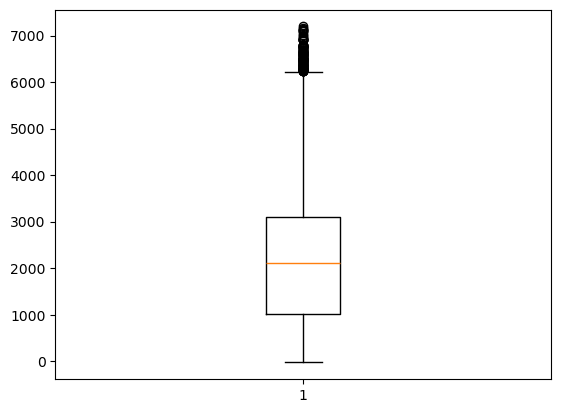

In [28]:
l=[]
med=visa_df['no_of_employees'].median()
Q1 = np.percentile(visa_df['no_of_employees'], 25)
Q3 = np.percentile(visa_df['no_of_employees'], 75)
LB=Q1-1.5*(Q3-Q1)
UB=Q3+1.5*(Q3-Q1)
for i in visa_df['no_of_employees'].values:
    if i<LB or i>UB:
        l.append(med)
    else:
        l.append(i)
visa_df_copy=visa_df.copy()
visa_df_copy['no_of_employees']=l
plt.boxplot(visa_df_copy['no_of_employees'])
